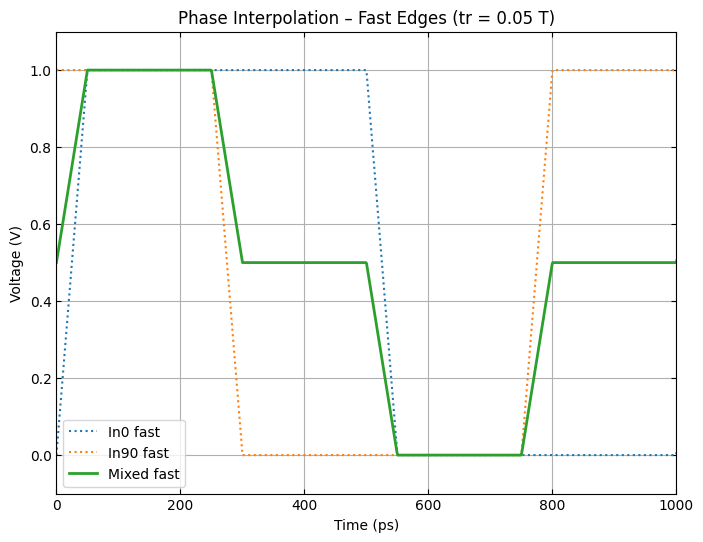

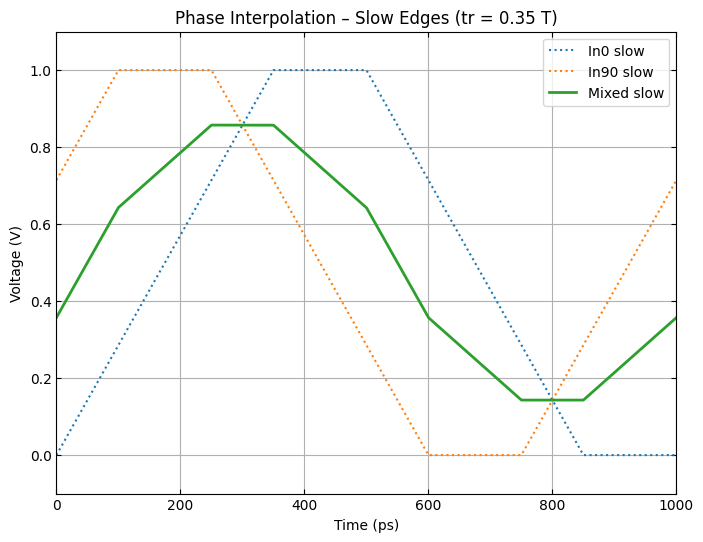

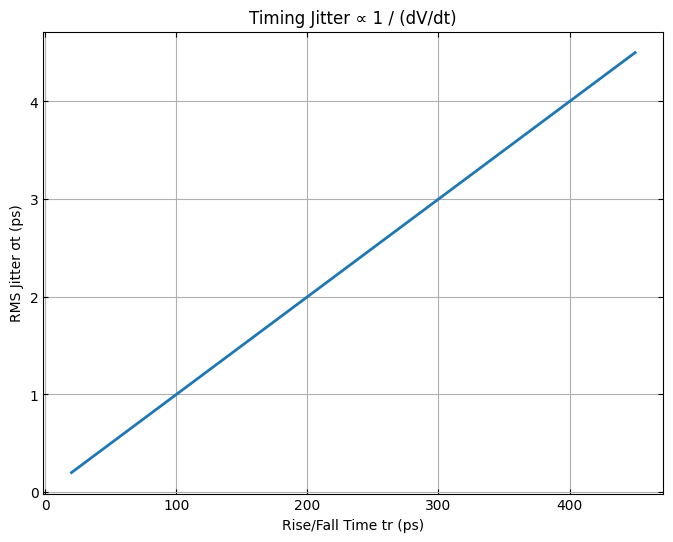

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Common parameters
VDD = 1.0
f = 1e9         # 1 GHz for illustration
T = 1 / f
t = np.linspace(0, 2*T, 2000)  # two periods

def trapezoid_wave(t, tr, T, VDD, phase=0.0):
    """Generate a trapezoidal wave with rise/fall time tr, duty 50 %."""
    t = (t + phase) % T
    th = T/2  # high level width
    v = np.zeros_like(t)
    # rise segment
    rise_end = tr
    fall_start = th
    fall_end = th + tr
    for i,ti in enumerate(t):
        if ti < rise_end:
            v[i] = VDD * ti/tr
        elif ti < fall_start:
            v[i] = VDD
        elif ti < fall_end:
            v[i] = VDD * (1 - (ti - fall_start)/tr)
        else:
            v[i] = 0.0
    return v

# Fast and slow rise times
tr_fast = 0.05*T       # very sharp
tr_slow = 0.35*T       # deliberately slow to satisfy overlap

# Generate signals
vin0_fast = trapezoid_wave(t, tr_fast, T, VDD, phase=0.0)
vin90_fast = trapezoid_wave(t, tr_fast, T, VDD, phase=T/4)
vin0_slow = trapezoid_wave(t, tr_slow, T, VDD, phase=0.0)
vin90_slow = trapezoid_wave(t, tr_slow, T, VDD, phase=T/4)

# Mixed outputs (equal weights)
vout_fast = 0.5*(vin0_fast + vin90_fast)
vout_slow = 0.5*(vin0_slow + vin90_slow)

# --- Chart 1: Fast edges ---
plt.figure(figsize=(8, 6))
plt.plot(t*1e12, vin0_fast, label='In0 fast', linestyle=':')
plt.plot(t*1e12, vin90_fast, label='In90 fast', linestyle=':')
plt.plot(t*1e12, vout_fast, label='Mixed fast', linewidth=2)
plt.xlim(0, T*1e12)
plt.ylim(-0.1, 1.1)
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.title('Phase Interpolation – Fast Edges (tr = 0.05 T)')
plt.legend()
plt.grid(True)
# Professional formatting
ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# --- Chart 2: Slow edges ---
plt.figure(figsize=(8, 6))
plt.plot(t*1e12, vin0_slow, label='In0 slow', linestyle=':')
plt.plot(t*1e12, vin90_slow, label='In90 slow', linestyle=':')
plt.plot(t*1e12, vout_slow, label='Mixed slow', linewidth=2)
plt.xlim(0, T*1e12)
plt.ylim(-0.1, 1.1)
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.title('Phase Interpolation – Slow Edges (tr = 0.35 T)')
plt.legend()
plt.grid(True)
# Professional formatting
ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# --- Chart 3: Jitter vs rise time ---
tr_vec = np.linspace(0.02*T, 0.45*T, 200)
slew = VDD / tr_vec
sigma_v = 0.01   # 10 mV noise
sigma_t = sigma_v / slew
plt.figure(figsize=(8, 6))
plt.plot(tr_vec*1e12, sigma_t*1e12, linewidth=2)
plt.xlabel('Rise/Fall Time tr (ps)')
plt.ylabel('RMS Jitter σt (ps)')
plt.title('Timing Jitter ∝ 1 / (dV/dt)')
plt.grid(True)
# Professional formatting
ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

plt.show()